# Jiiter plots in ggplot

In this notebook you can find code snippets that I always reuse for simulating dataset

- toc: true 
- badges: true
- comments: false
- categories: [r][ggplot]


- dataset

In [1]:
library(ggplot2)
library(gridExtra)
library(data.table)
library(RColorBrewer)
library(ggpubr)
library(rstatix)
library(ggrepel)


genDataset <- function(number_of_rows,means,sds)
{
l <- length(means)
res <- lapply(seq(1:l),function(x) eval(parse(text=paste("rnorm(",number_of_rows,",",means[x],")",sep="")))) 
data.frame((sapply(res,c)))
return(res)
}

dat <- genDataset(number_of_rows=100,means=c(90,100,105,105,101,103),sds=c(30,20,25,30,30,30))
dat <- data.frame((sapply(dat,c)))
id <- rownames(dat)
dat <-  cbind(id=id,dat)
dt <- data.table(dat)
#we rearrange our table using melt
dt.melt <- melt(dt)
colnames(dt.melt) <- c("id","category","var1")



Attaching package: 'rstatix'


The following object is masked from 'package:stats':

    filter


Warning message in melt.data.table(dt):
"id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [id, ...]. Consider providing at least one of 'id' or 'measure' vars in future."


-  Base plot in ggplot 


In [3]:
#setup of the base ggplot


base <- ggplot(dt.melt, aes(x=category, y=var1)) +
		labs(title = "Title",
			 x     = "xaxis lab",
             y     = "yaxis lab",
             subtitle = "subtitle",
             tag = "a")     				 +
		     theme_classic(base_size = 14)		 +
			 theme(legend.position = "none",
			 axis.text.x = element_text(size=14,face="bold"),
			 axis.text.y = element_text(size=14,face="bold"))
			 




- Jiiter plot

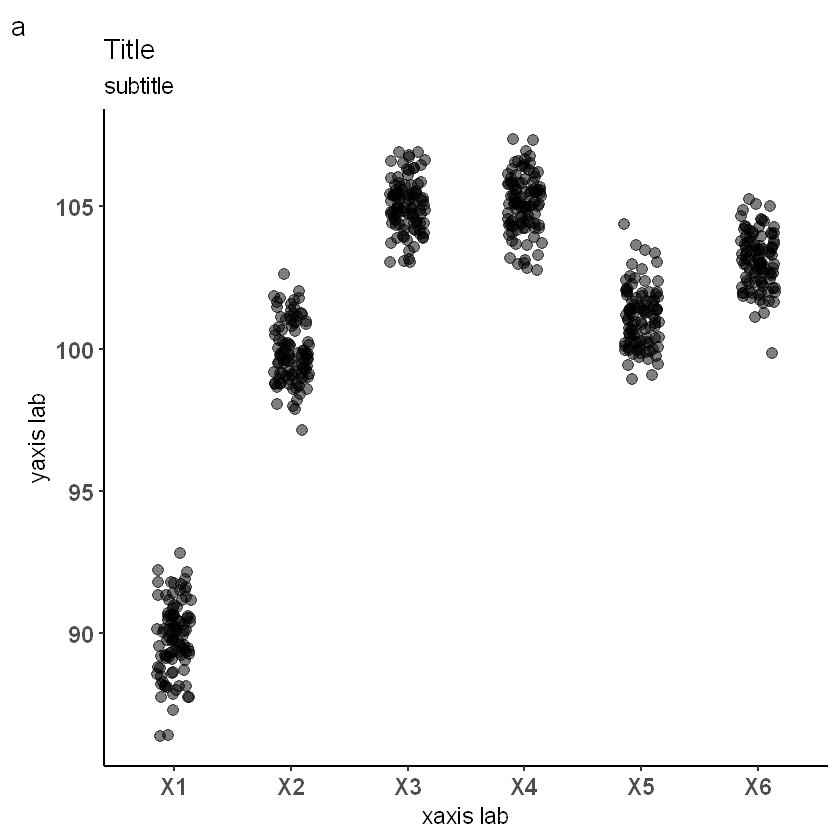

In [4]:

pv  <- base + geom_jitter(
			 position = position_jitter(0.15),
			 alpha=0.5,, size = 3) 
pv

- Flipped



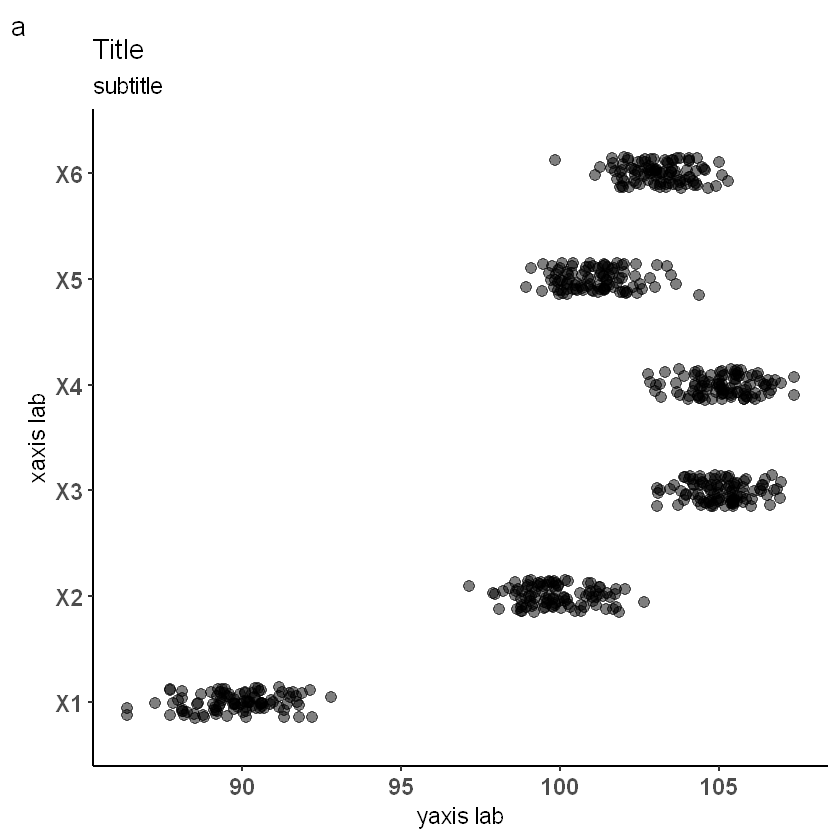

In [5]:
#short names
ph <- pv + coord_flip() 
ph








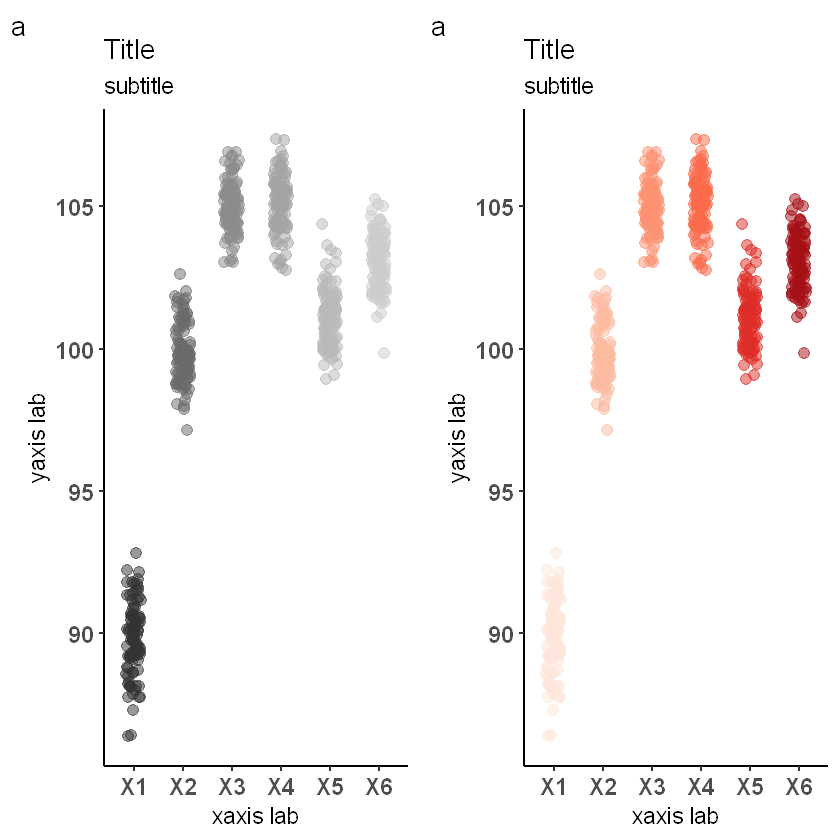

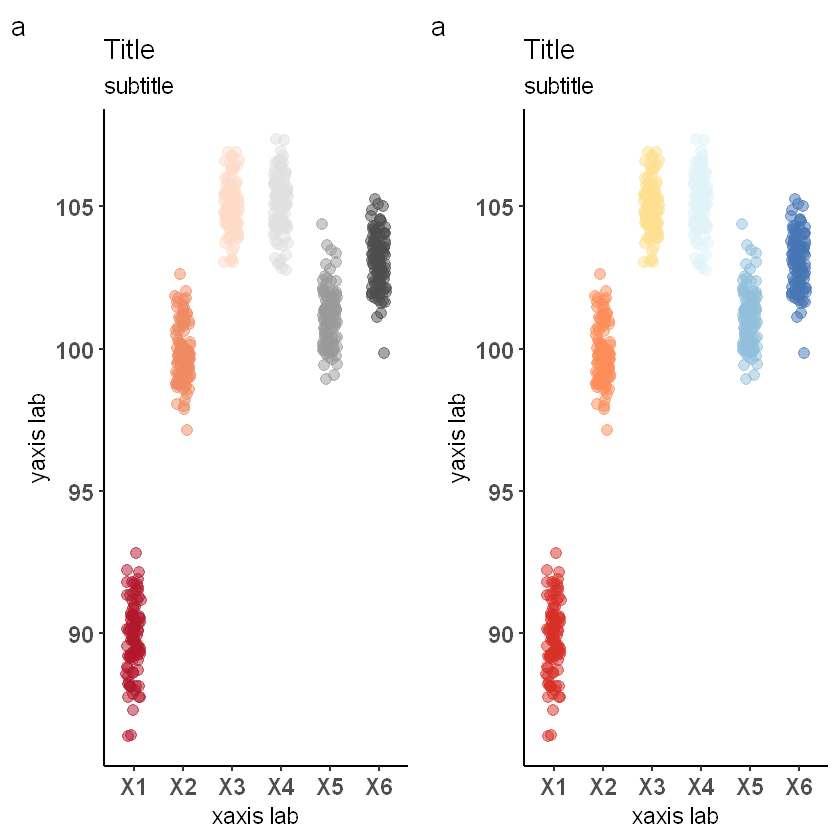

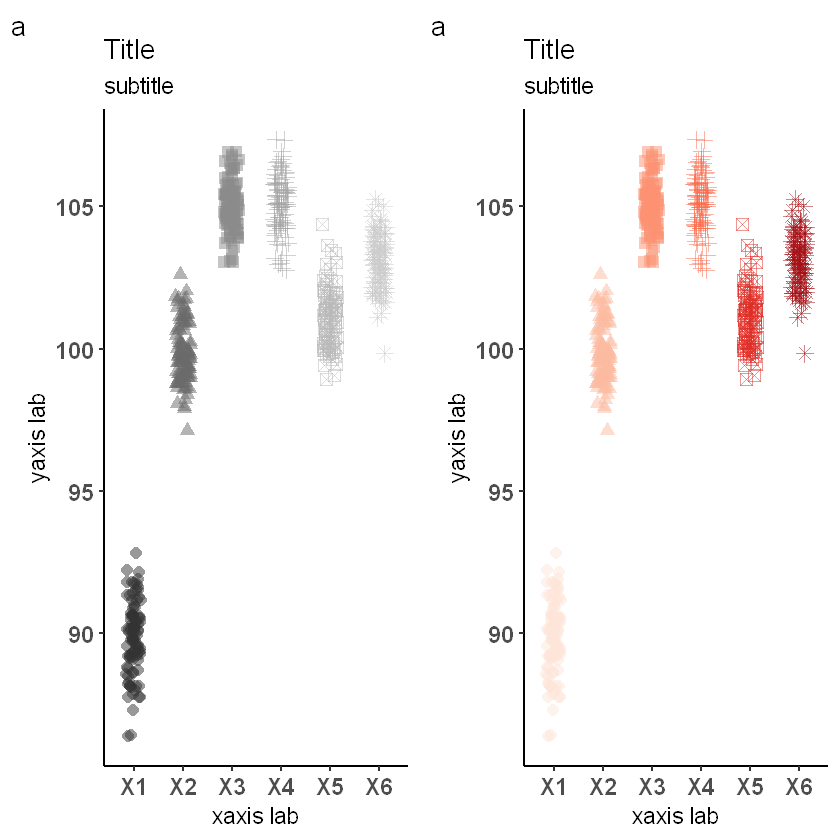

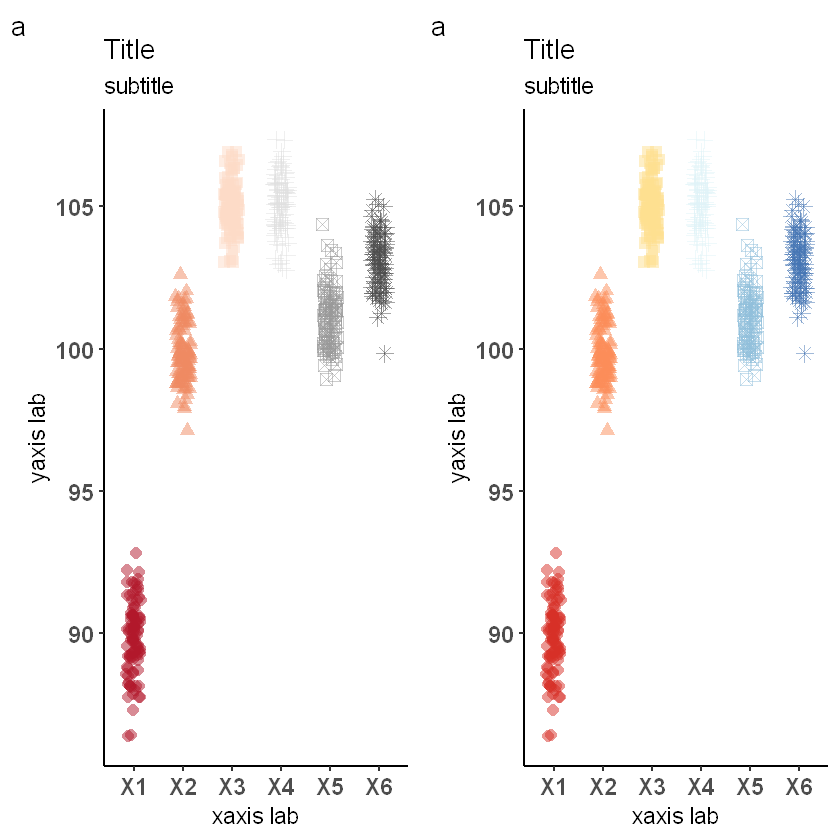

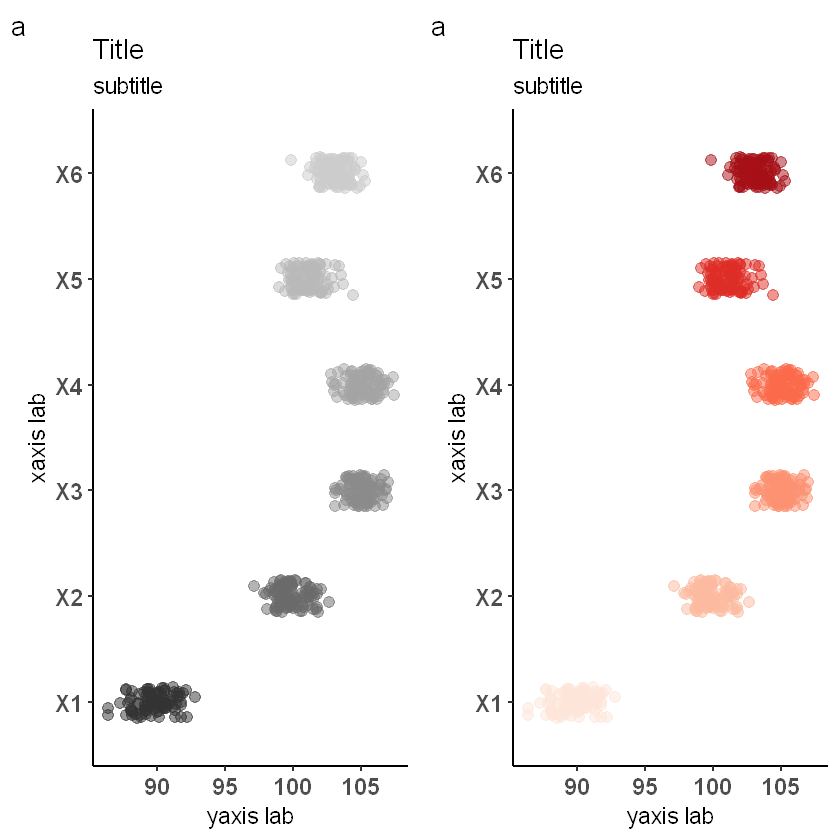

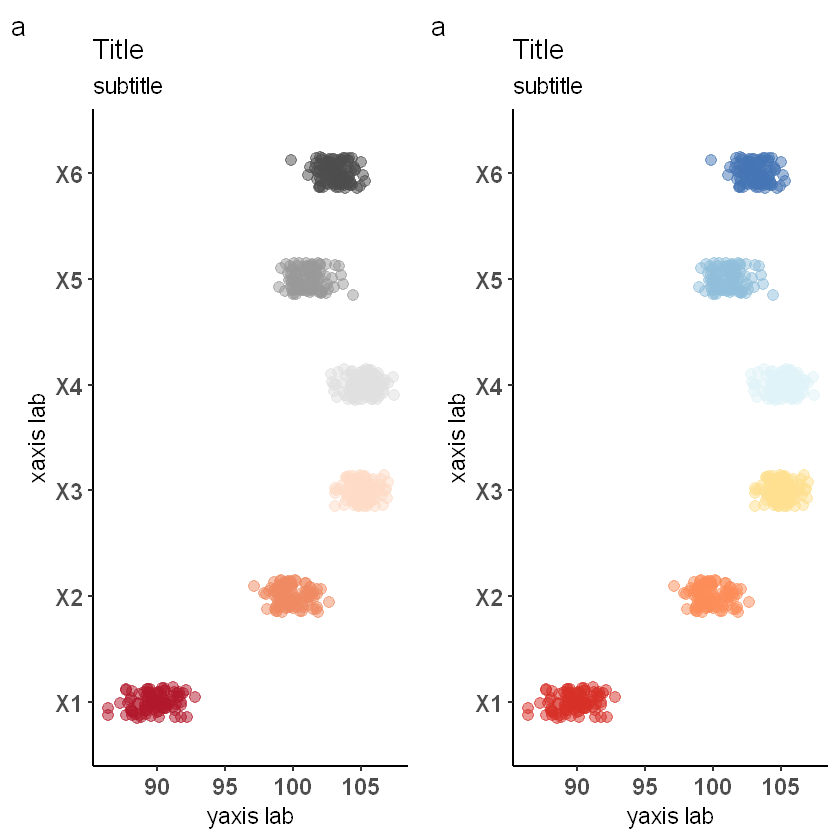

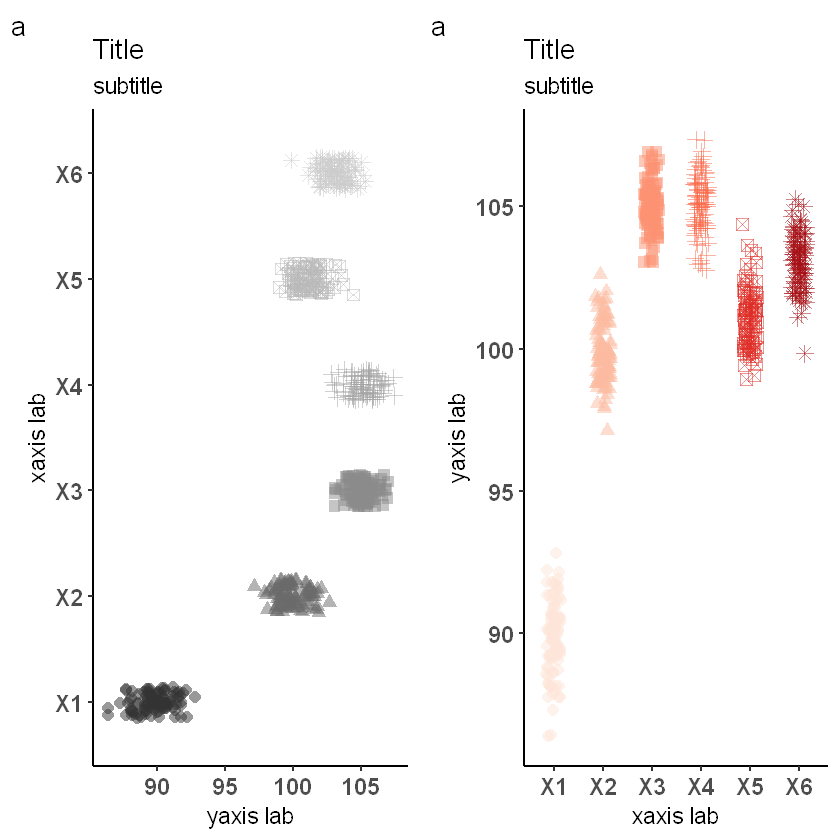

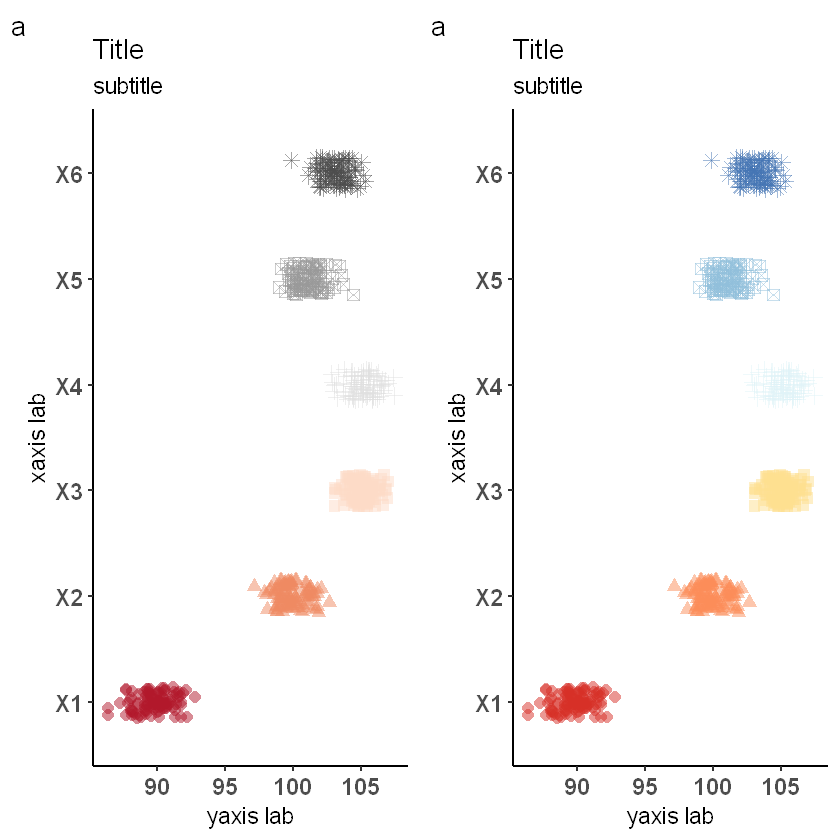

In [8]:
# categories with n < 5

ph  <- pv + coord_flip() 
pvc <- pv + aes(shape = category)			
phc <- pvc + coord_flip() 

pv_grey 	   <- pv + aes(color = category) + 	scale_color_grey()
pv_sequential  <- pv + aes(color = category) + 	scale_color_brewer(palette="Reds")
pv_diverging   <- pv + aes(color = category) + 	scale_color_brewer(palette="RdGy")
pv_qualitative <- pv + aes(color = category) + 	scale_color_brewer(palette="RdYlBu")

ph_grey 	   <- ph + aes(color = category) + 	scale_color_grey()
ph_sequential  <- ph + aes(color = category) + 	scale_color_brewer(palette="Reds")
ph_diverging   <- ph + aes(color = category) + 	scale_color_brewer(palette="RdGy")
ph_qualitative <- ph + aes(color = category) + 	scale_color_brewer(palette="RdYlBu")

pvc_grey 	   <- pvc + aes(color = category) + 	scale_color_grey()
pvc_sequential  <- pvc + aes(color = category) + 	scale_color_brewer(palette="Reds")
pvc_diverging   <- pvc + aes(color = category) + 	scale_color_brewer(palette="RdGy")
pvc_qualitative <- pvc + aes(color = category) + 	scale_color_brewer(palette="RdYlBu")


phc_grey 	   <- phc + aes(color = category) + 	scale_color_grey()
phc_sequential  <- phc + aes(color = category) + 	scale_color_brewer(palette="Reds")
phc_diverging   <- phc + aes(color = category) + 	scale_color_brewer(palette="RdGy")
phc_qualitative <- phc + aes(color = category) + 	scale_color_brewer(palette="RdYlBu")


pg10 <-  grid.arrange(pv_grey,pv_sequential, ncol = 2,nrow = 1)
pg11 <-  grid.arrange(pv_diverging,pv_qualitative, ncol = 2,nrow = 1)
pg20 <-  grid.arrange(pvc_grey,pvc_sequential, ncol = 2,nrow = 1)
pg21 <-  grid.arrange(pvc_diverging,pvc_qualitative, ncol = 2,nrow = 1)
pg30 <-  grid.arrange(ph_grey,ph_sequential, ncol = 2,nrow = 1)
pg31 <-  grid.arrange(ph_diverging,ph_qualitative, ncol = 2,nrow = 1)
pg40 <-  grid.arrange(phc_grey,pvc_sequential, ncol = 2,nrow = 1)
pg41 <-  grid.arrange(phc_diverging,phc_qualitative, ncol = 2,nrow = 1)






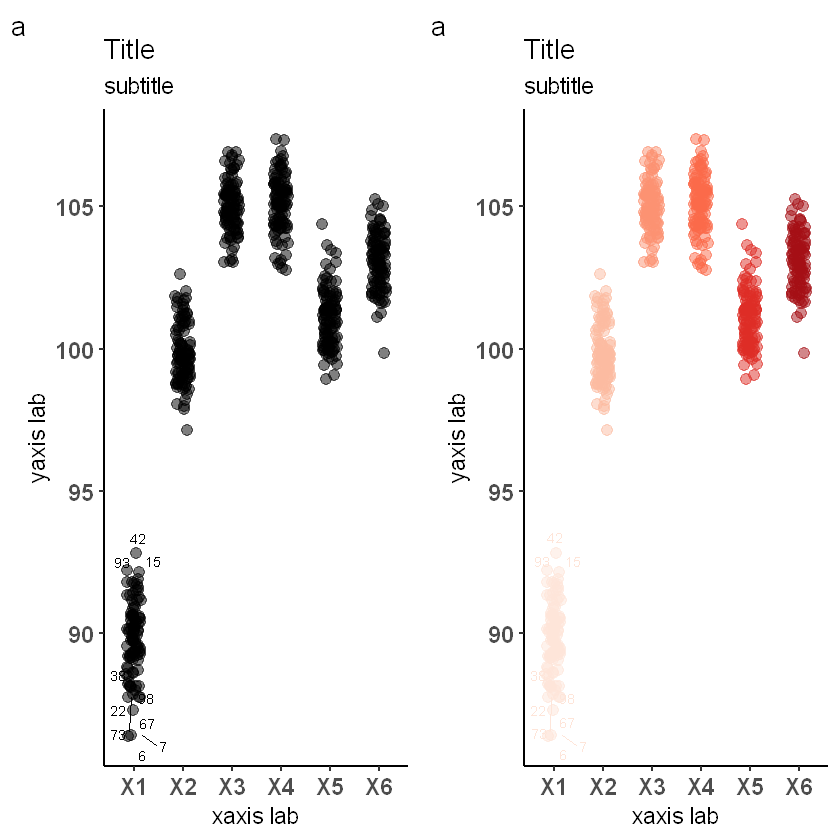

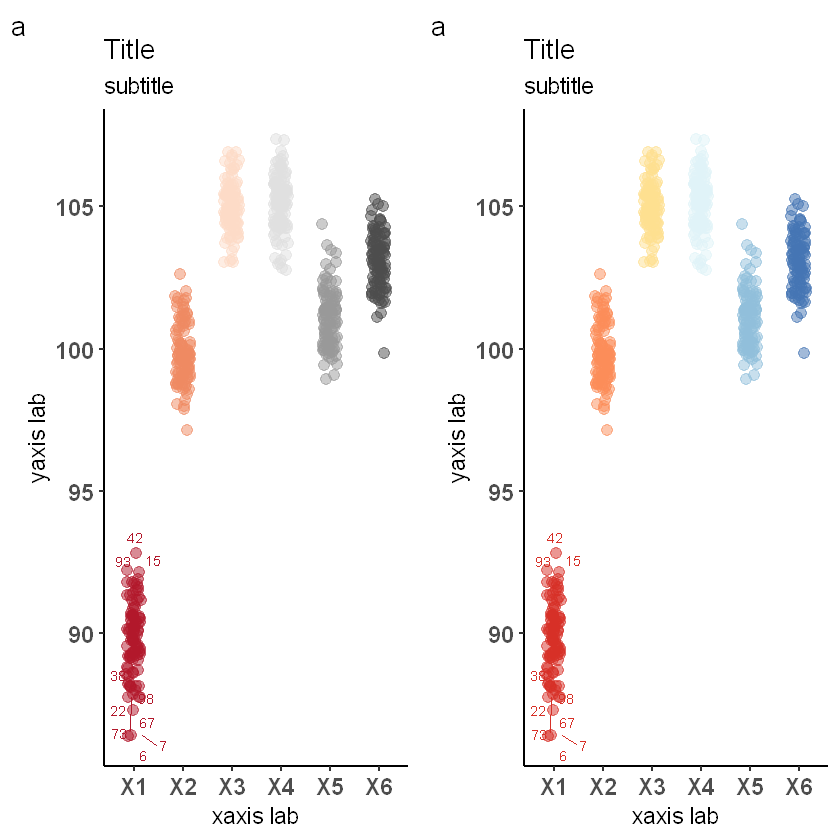

In [15]:
# adding a text to specific points using conditions (can be an ID, a category etc)
# in this example we add text to points under an lower lim
# AND above an upper lim

uplim  <- 92
lowlim <- 88

p2 <- pv +  geom_text_repel(data=dt.melt[category=="X1"],aes(label=ifelse(((var1 > uplim | var1 < lowlim )),as.character(id),'')),position = position_jitter(0.2,seed = 1),size=3) 
p2_sequential  <- p2 + aes(color = category) + 	scale_color_brewer(palette="Reds")
p2_diverging   <- p2 + aes(color = category) + 	scale_color_brewer(palette="RdGy")
p2_qualitative <- p2 + aes(color = category) + 	scale_color_brewer(palette="RdYlBu")  



pg20 <-  grid.arrange(p2,p2_sequential, ncol = 2,nrow = 1)
pg21 <-  grid.arrange(p2_diverging,p2_qualitative, ncol = 2,nrow = 1)


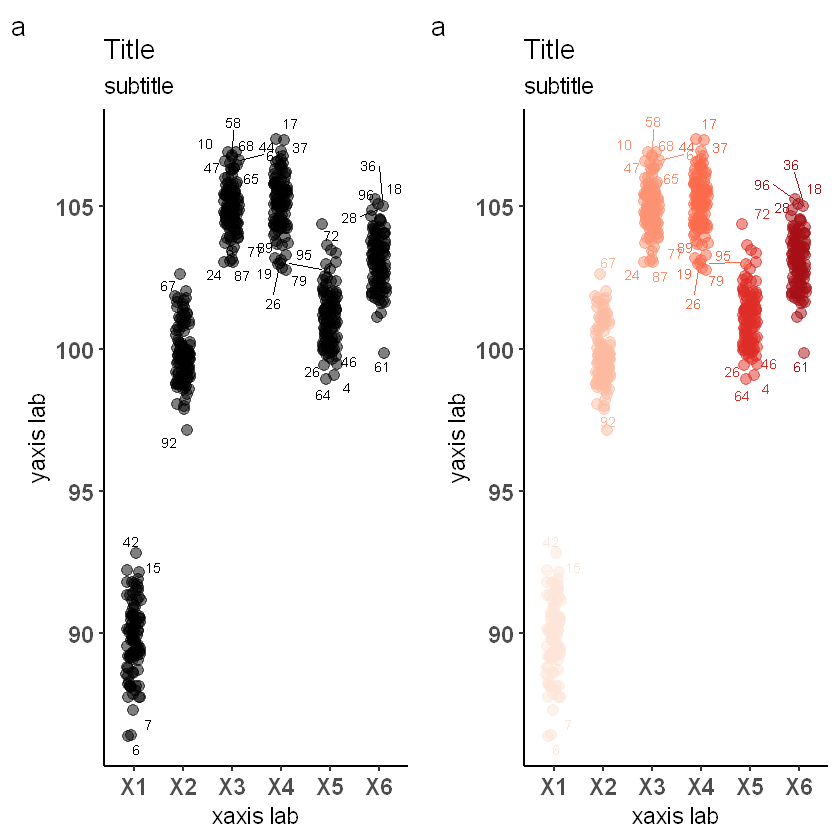

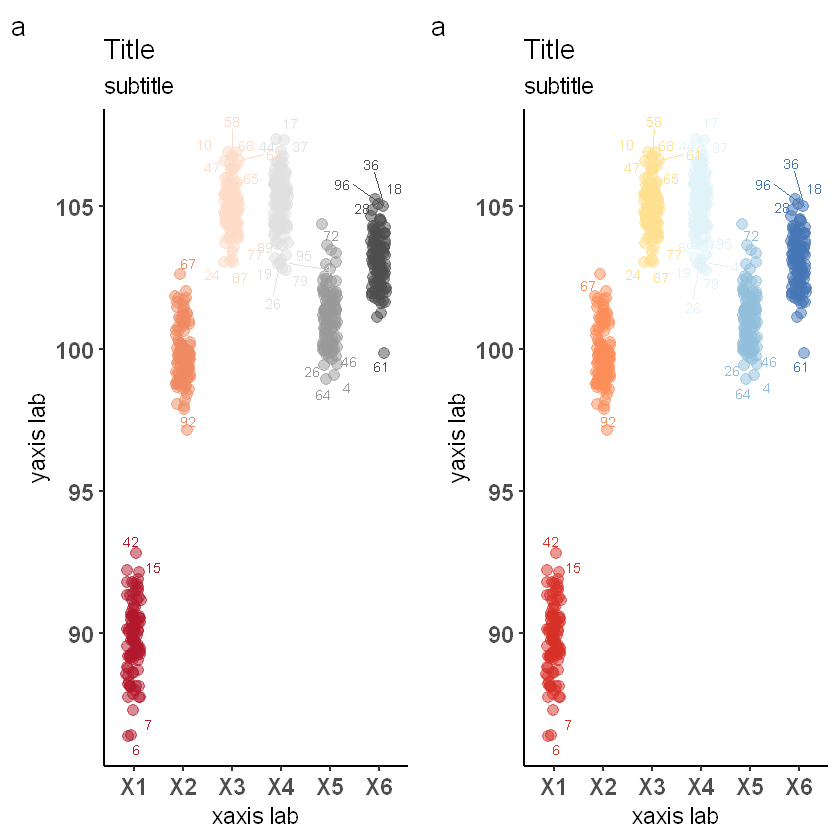

In [16]:
# adding a text to specific points using conditions (can be an ID, a category etc)
# in this example we add text to points under an lower lim
# AND above an upper lim



# Automatic

NormTextlim <- function(x, nsigma){
					limup   <- mean(x)  + nsigma*sd(x)
					limlow  <- mean(x) - nsigma*sd(x)
					l       <- list("limup"=limup,"limlow"=limlow)
					return(l)
					}
					
Utextlim <- function(x, ndiv){
					nth_div <- (max(x)-min(x))/ndiv
					limup   <- max(x)  - nth_div
					limlow  <- min(x)  + nth_div
					l       <- list("limup"=limup,"limlow"=limlow)
					return(l)
					}
			
unique_category <- unique(dt.melt$category)		
	

p3 <- pv +
	  lapply(seq(1,length(unique_category)), 
	  function(x) 
	  geom_text_repel(data=dt.melt[category==as.character(unique_category[x])],
	  aes(label=ifelse(((var1 > Utextlim((dt.melt[category==as.character(unique_category[x])])$var1,10)$limup | var1 < Utextlim((dt.melt[category==as.character(unique_category[x])])$var1,10)$limlow )),
	  as.character(id),'')),
	  position = position_jitter(0.2,seed = 1),size=3)) 
	  
p3_sequential  <- p3 + aes(color = category) + 	scale_color_brewer(palette="Reds")
p3_diverging   <- p3 + aes(color = category) + 	scale_color_brewer(palette="RdGy")
p3_qualitative <- p3 + aes(color = category) + 	scale_color_brewer(palette="RdYlBu")  

pg30 <-  grid.arrange(p3,p3_sequential, ncol = 2,nrow = 1)
pg31 <-  grid.arrange(p3_diverging,p3_qualitative, ncol = 2,nrow = 1)


#SHAPE PALETTE 6 MAX Otherwise they will get empty so you need to take out the shape option





Warning message in max(x):
"no non-missing arguments to max; returning -Inf"
Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"
Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"
Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"
Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"
Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"
Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"
Warni

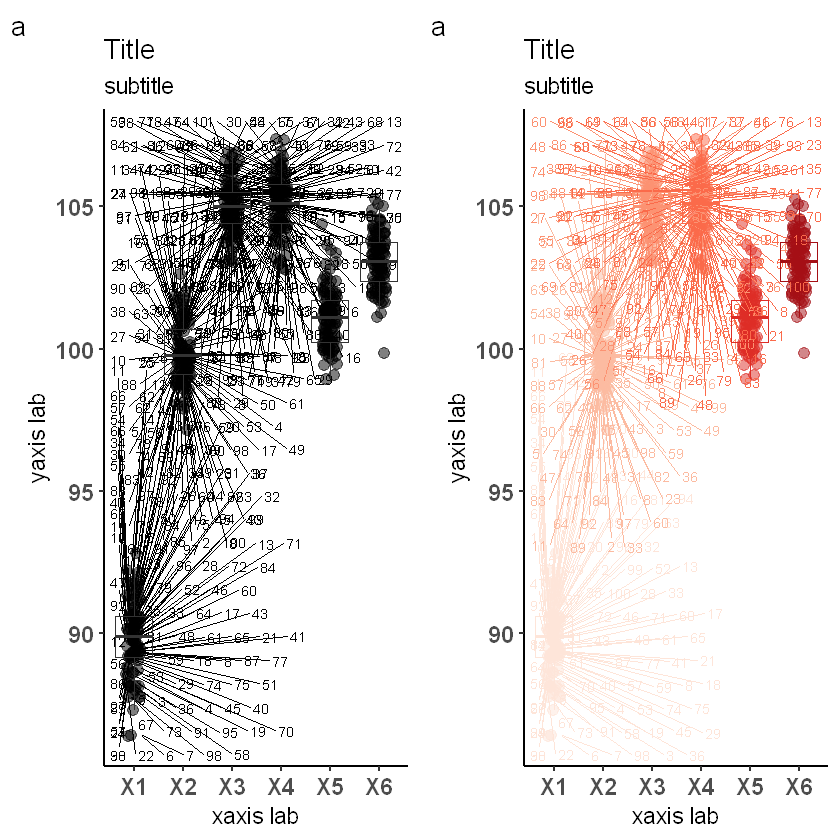

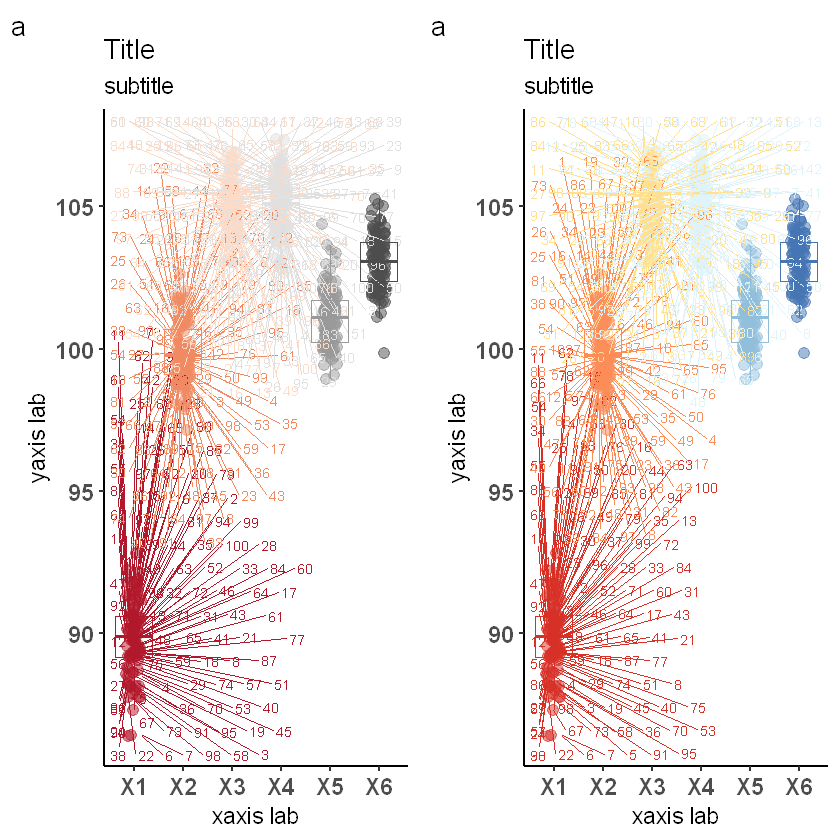

In [21]:
# we add a boxplot


p4 <- p3 + geom_boxplot(alpha = 0)
p4_sequential  <- p4 + aes(color = category) + 	scale_color_brewer(palette="Reds")
p4_diverging   <- p4 + aes(color = category) + 	scale_color_brewer(palette="RdGy")
p4_qualitative <- p4 + aes(color = category) + 	scale_color_brewer(palette="RdYlBu")  

pg40 <-  grid.arrange(p4,p4_sequential, ncol = 2,nrow = 1)
pg41 <-  grid.arrange(p4_diverging,p4_qualitative, ncol = 2,nrow = 1)




Warning message in melt.data.table(dt):
"id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [id, ...]. Consider providing at least one of 'id' or 'measure' vars in future."


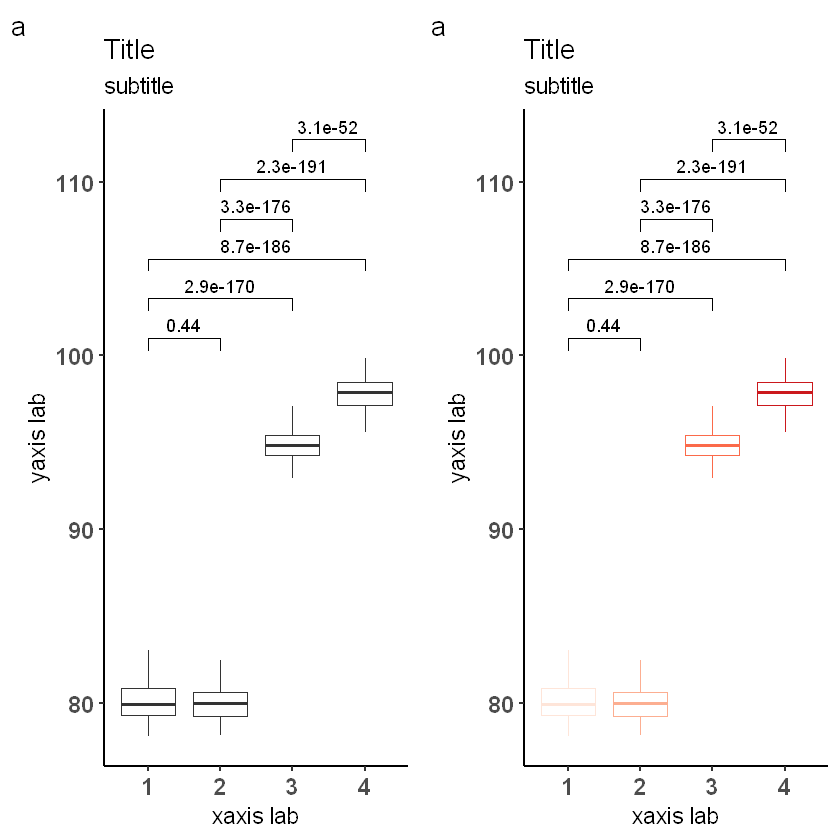

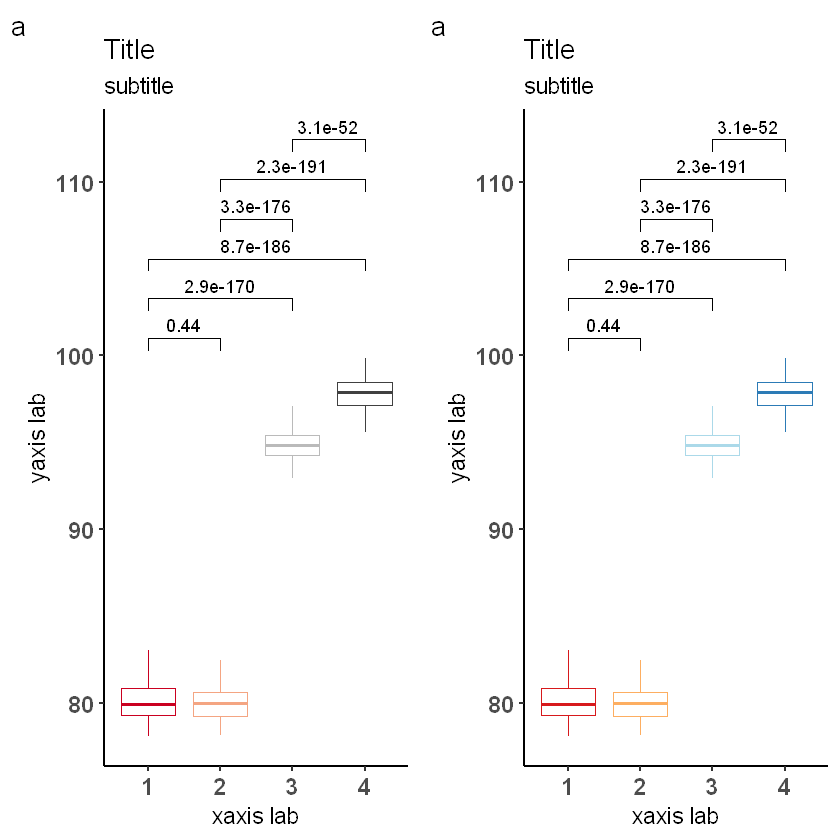

In [20]:
# adding brackets with P
#  WARNING! BEFORE applying any statistical tests 
#  you need to check if your dataset follows the requirements for 
#  the test you are applying
#  generating a smaller dataset

library(dplyr) 
library(rstatix)
#to later use the %>% operator and using a pipe friendly framework to
#perform t-tests

dat <- genDataset(number_of_rows=100,means=c(80,80,95,98),sds=c(5,5,1,1))
dat <- data.frame((sapply(dat,c)))
id <- rownames(dat)
dat <-  cbind(id=id,dat)
dt <- data.table(dat)

#we rearrange our table using melt
dt.melt <- melt(dt)
colnames(dt.melt) <- c("id","category","var1")
dt.melt$ncat <- as.numeric(dt.melt$category)

# perform the statistical analysis
stat.test <- dt.melt %>% t_test(var1 ~ ncat)

#load library 
library(ggpubr)


  
maxy <- round(max(dt.melt$var1))


#for creating the boxolot we convert ncat as factor
base2 <- ggplot(dt.melt, aes(x=factor(ncat), y=var1)) +
		labs(title = "Title",
			 x     = "xaxis lab",
             y     = "yaxis lab",
             subtitle = "subtitle",
             tag = "a")     				 +
		     theme_classic(base_size = 14)		 +
			 theme(legend.position = "none",
			 axis.text.x = element_text(size=14,face="bold"),
			 axis.text.y = element_text(size=14,face="bold"))

pbox <- base2 + geom_boxplot(alpha = 0)

#Since we don't want the bracked to be colored we need to prepare
#the colored boxplot BEFORE applying the brackets

pbox_sequential  <- pbox + aes(color = factor(ncat)) + 	scale_color_brewer(palette="Reds")
pbox_diverging   <- pbox + aes(color = factor(ncat)) + 	scale_color_brewer(palette="RdGy")
pbox_qualitative <- pbox + aes(color = factor(ncat)) + 	scale_color_brewer(palette="RdYlBu")  

p5  <- pbox + geom_bracket(
    aes(xmin = group1, xmax = group2, label = signif(p, 2)),
    data = stat.test, y.position = maxy, step.increase = 0.1
  )

#we need to specify that we do not want to inherit.aes

p5_sequential <- pbox_sequential + geom_bracket( inherit.aes = FALSE, 
	aes(
	xmin = group1,
	xmax = group2,
	label = signif(p, 2)),
    data = stat.test,
	y.position = maxy,
	step.increase = 0.1
	)


p5_diverging <- pbox_diverging + geom_bracket( inherit.aes = FALSE, 
	aes(
	xmin = group1,
	xmax = group2,
	label = signif(p, 2)),
    data = stat.test,
	y.position = maxy,
	step.increase = 0.1
	)

 
p5_qualitative <- pbox_qualitative + geom_bracket( inherit.aes = FALSE, 
	aes(
	xmin = group1,
	xmax = group2,
	label = signif(p, 2)),
    data = stat.test,
	y.position = maxy,
	step.increase = 0.1
	)

pg50 <-  grid.arrange(p5,p5_sequential, ncol = 2,nrow = 1)
pg51 <-  grid.arrange(p5_diverging,p5_qualitative, ncol = 2,nrow = 1)

